<a href="https://colab.research.google.com/github/nyammmm/CPE311/blob/main/Midterm%20Exam/Midterm_Exam_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ucimlrepo

In [145]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

In [201]:
import pandas as pd
import numpy as np
df = pd.concat([X,y], axis=1)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [202]:
df = df.replace({'?': None})

In [203]:
df['workclass'] = df['workclass'].fillna('Never-worked')

In [204]:
df = df.fillna(value='None')

In [205]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,Never-worked,321403,HS-grad,9,Widowed,None,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [209]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [237]:
df['relationship'].unique()

array(['Own-child', 'Other-relative', 'Not-in-family', 'Single',
       'Husband', 'Wife'], dtype=object)

In [211]:
df['income'] = df['income'].replace({'>50K.':'Over 50,000',
                                     '>50K':'Over 50,000',
                                     '<=50K':'Under 50,000',
                                     '<=50K.':'Under 50,000'})

In [234]:
df['marital-status'] = df['marital-status'].replace({'Never-Married':'Single',
                                                     'Married-civ-spouse':'Married',
                                                     'Married-AF-spouse':'Married',
                                                     'Married-spouse-absent':'Married'})

In [212]:
df['workclass'] = df['workclass'].replace({'Without-pay':'Interns',
                                          'Local-gov':'Civil Servant',
                                          'State-gov':'Civil Servant',
                                          'Federal-gov':'Civil Servant',
                                          'Self-emp-inc':'Self Employed',
                                          'Self-emp-not-inc':'Self Employed',
                                          'Private':'Office Worker',
                                          'Never-worked':'Unemployed'})

In [213]:
df['education'] = df['education'].replace({'1st-4th': 'Compulsory',
                                          '5th-6th': 'Compulsory',
                                          '7th-8th': 'Compulsory',
                                          '9th': 'Compulsory',
                                          '10th': 'Compulsory',
                                          '11th': 'Compulsory',
                                          '12th': 'Compulsory',
                                          'Preschool': 'Compulsory',
                                          'Bachelors': 'Bachelors',
                                          'Some-college': 'Bachelors',
                                          'Assoc-acdm': 'Associate',
                                          'Assoc-voc': 'Associate',
                                          'Masters': 'Postgraduate',
                                          'Doctorate': 'Postgraduate',
                                          'Prof-school': 'Postgraduate',
                                          'HS-grad': 'HS Graduate'})

In [214]:
df['relationship'] = df['relationship'].replace({'Unmarried':'Single'})

In [215]:
df['race'] = df['race'].replace({'Asian-Pac-Islander': 'Asian', 'Amer-Indian-Eskimo': 'Native American'})

In [216]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
28092,17,Office Worker,36877,Compulsory,6,Never-married,Sales,Own-child,White,Female,0,0,10,United-States,"Under 50,000"
46962,17,Office Worker,73820,Compulsory,8,Never-married,Sales,Own-child,White,Female,0,0,8,United-States,"Under 50,000"
42922,17,Office Worker,165457,Compulsory,6,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,"Under 50,000"
1389,17,Office Worker,46496,Compulsory,7,Never-married,Other-service,Own-child,White,Male,0,0,5,United-States,"Under 50,000"
32963,17,Office Worker,40299,Compulsory,7,Never-married,Sales,Own-child,White,Female,0,0,25,United-States,"Under 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,90,Office Worker,52386,Bachelors,10,Never-married,Other-service,Not-in-family,Asian,Male,0,0,35,United-States,"Under 50,000"
18725,90,Civil Servant,153602,HS Graduate,9,Married-civ-spouse,Other-service,Husband,White,Male,6767,0,40,United-States,"Under 50,000"
222,90,Office Worker,51744,HS Graduate,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,"Under 50,000"
31696,90,Unemployed,313986,HS Graduate,9,Married-civ-spouse,None,Husband,White,Male,0,0,40,United-States,"Over 50,000"


In [219]:
maledf = df[df['sex']=='Male']

In [274]:
femaledf = df[df['sex']=='Female']

In [217]:
over50df = df[df['income']=='Over 50,000']

<ipython-input-261-664bcb675745>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='age', data=df, width=0.6, fliersize=3, linewidth=1.5, palette=['#9FC3D0', '#E9C7C6'])


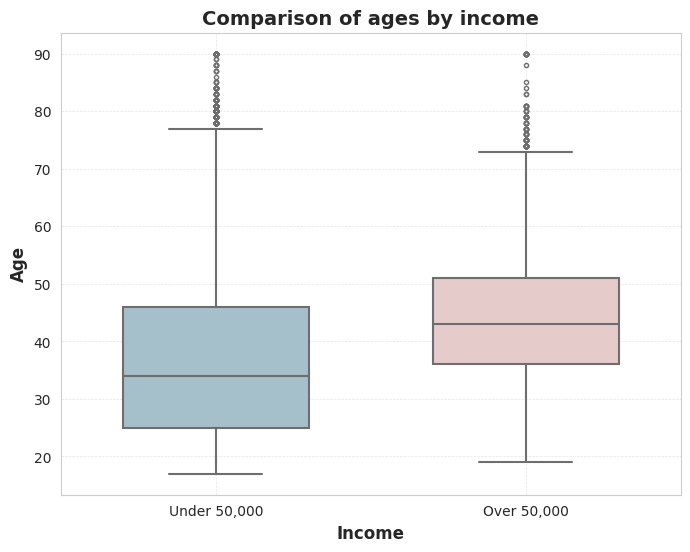

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='income', y='age', data=df, width=0.6, fliersize=3, linewidth=1.5, palette=['#9FC3D0', '#E9C7C6'])
plt.title('Comparison of ages by income', fontsize=14, fontweight='bold')
plt.xlabel('Income', fontsize=12, fontweight='bold')
plt.ylabel('Age', fontsize=12, fontweight='bold')
plt.rcParams['figure.figsize'] = (8, 6)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

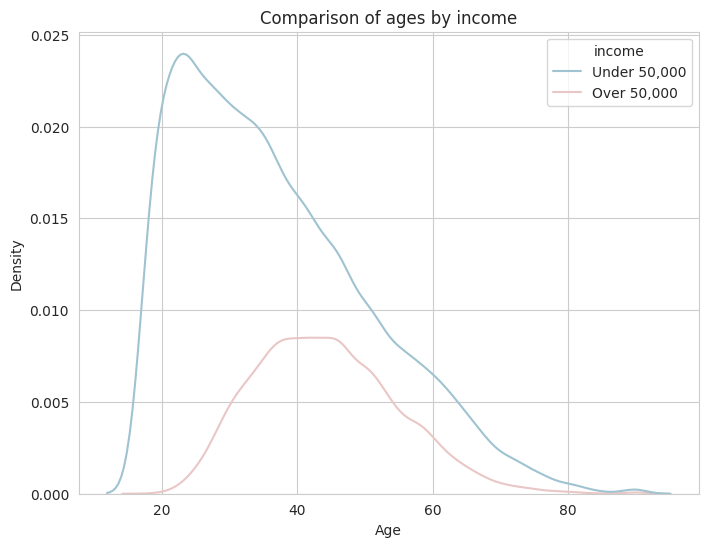

In [277]:
sns.kdeplot(data=df, x='age', hue='income', palette=['#9FC3D0', '#E9C7C6'])
plt.title('Comparison of ages by income')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

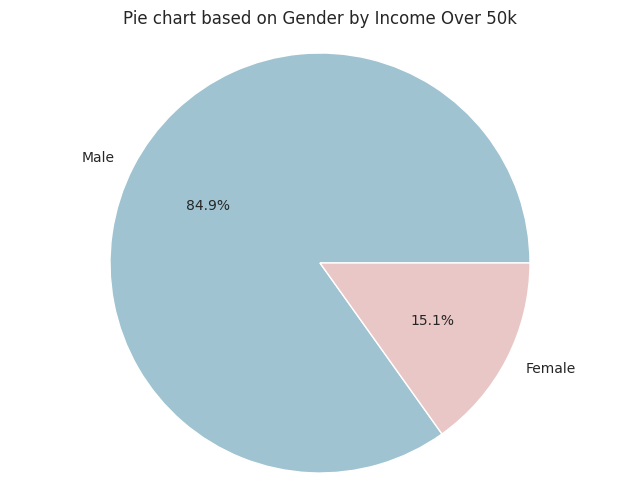

In [260]:
# Create a pie chart of the number of cars by cyl
labels = over50df['sex'].value_counts().index
sizes = over50df['sex'].value_counts().values
colors = ['#9FC3D0', '#E9C7C6']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie chart based on Gender by Income Over 50k')
plt.show()

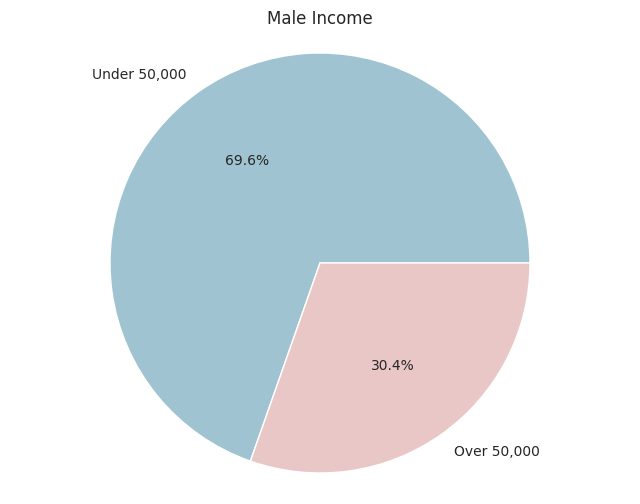

In [262]:
# Create a pie chart of the number of cars by cyl
labels = maledf['income'].value_counts().index
sizes = maledf['income'].value_counts().values
colors = ['#9FC3D0', '#E9C7C6']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Male Income')
plt.show()

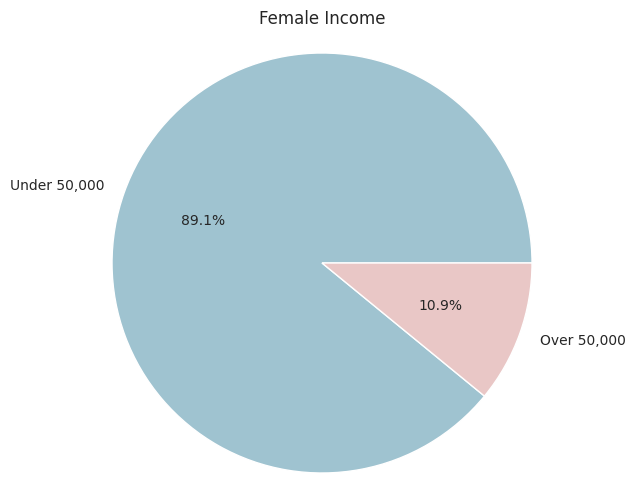

In [263]:
# Create a pie chart of the number of cars by cyl
labels = femaledf['income'].value_counts().index
sizes = femaledf['income'].value_counts().values
colors = ['#9FC3D0', '#E9C7C6']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Female Income')
plt.show()

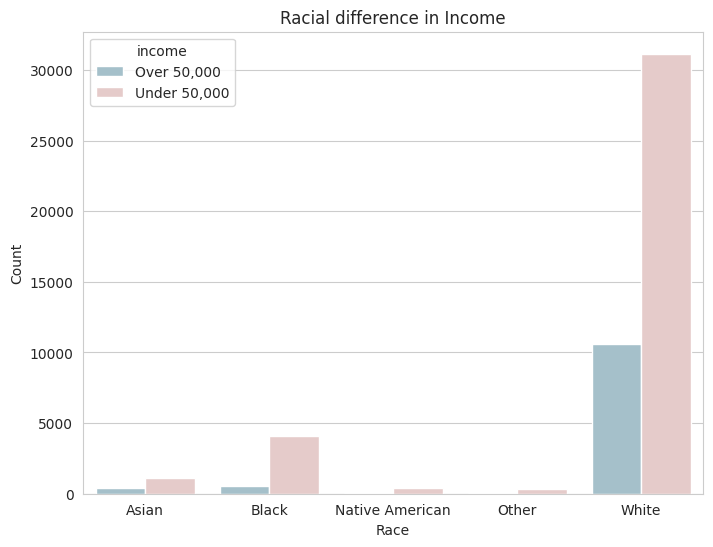

In [264]:
grouped_data = df.groupby(['income', 'race']).size().reset_index(name='counts')
sns.barplot(x='race', y='counts', hue='income', data=grouped_data, palette=['#9FC3D0', '#E9C7C6'])
plt.title('Racial difference in Income')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

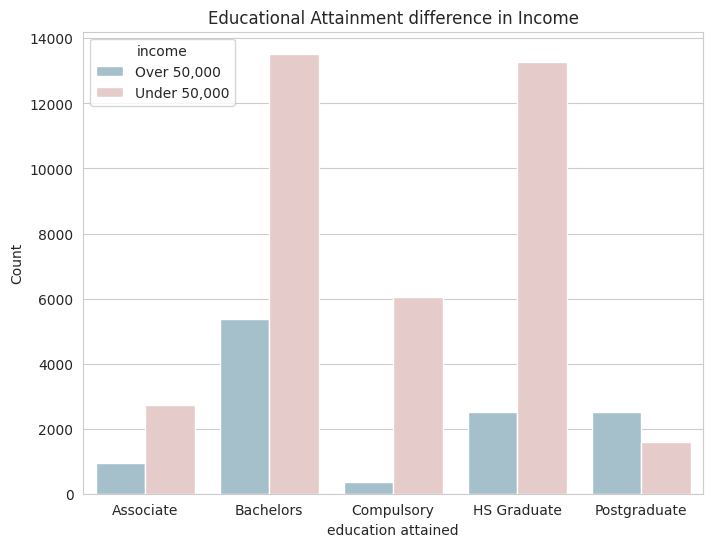

In [265]:
grouped_data = df.groupby(['income', 'education']).size().reset_index(name='counts')
sns.barplot(x='education', y='counts', hue='income', data=grouped_data, palette=['#9FC3D0', '#E9C7C6'])
plt.title('Educational Attainment difference in Income')
plt.xlabel('education attained')
plt.ylabel('Count')
plt.show()

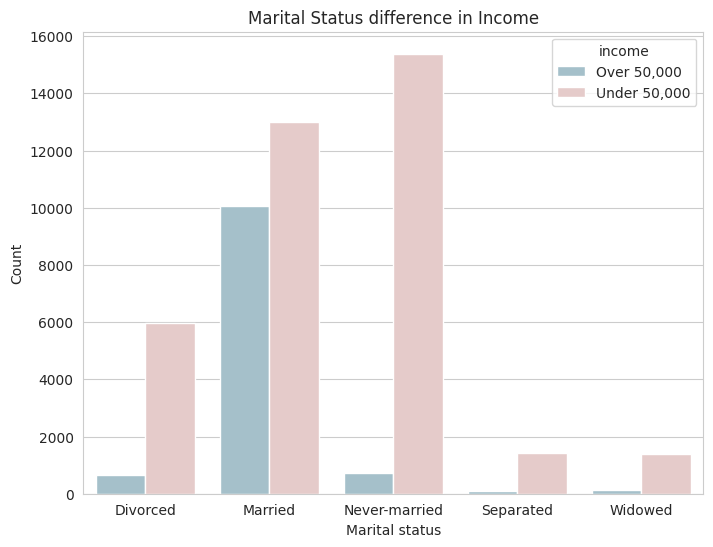

In [268]:
grouped_data = df.groupby(['income', 'marital-status']).size().reset_index(name='counts')
sns.barplot(x='marital-status', y='counts', hue='income', data=grouped_data, palette=['#9FC3D0', '#E9C7C6'])
plt.title('Marital Status difference in Income')
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.show()

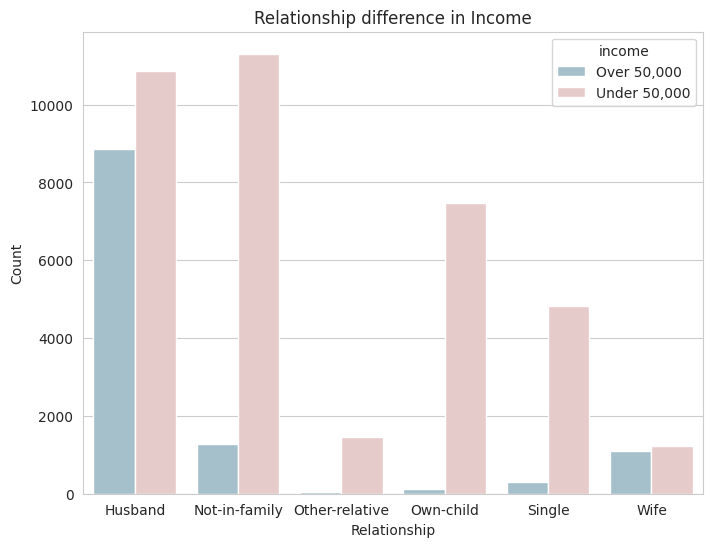

In [269]:
grouped_data = df.groupby(['income', 'relationship']).size().reset_index(name='counts')
sns.barplot(x='relationship', y='counts', hue='income', data=grouped_data, palette=['#9FC3D0', '#E9C7C6'])
plt.title('Relationship difference in Income')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.show()